<a href="https://colab.research.google.com/github/mirzafaradiba01/PCVK-Semester5/blob/main/3A_18_Mirza_Priscilla_Faradiba_Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama : Mirza Priscilla Faradiba**

**Kelas : TI-3A**

**No.Absen : 18**

**Materi : Filter Spasial Low Pass Filter, High Pass Filter, Point
Detection, Line Detection, Edge Detection**

#PRAKTIKUM FILTER

In [1]:
# Import modul drive dari google.colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

In [8]:
def convolution2d(image, kernel, stride, padding):

    image = np.pad(image, pad_width=padding, mode='constant', constant_values=0)

    # mengambil ukuran dari citra dan kernel
    image_row, image_col = image.shape
    kernel_row, kernel_col = kernel.shape

    # menghitung ukuran dari citra hasil konvolusi
    output_row = int((image_row - kernel_row + 2 * padding) / stride) + 1
    output_col = int((image_col - kernel_col + 2 * padding) / stride) + 1

    # jika padding tidak digunakan, maka padding = 0
    if padding == 0:
        pad = 0
    else:
        pad = padding

    # membuat matriks kosong untuk citra hasil konvolusi
    output = np.zeros((output_row, output_col))

    # melakukan konvolusi
    for row in range(output_row):
        for col in range(output_col):
            # mengambil bagian dari citra sesuai dengan ukuran kernel
            image_part = image[row * stride:row * stride + kernel_row, col * stride:col * stride + kernel_col]
            # memastikan ukuran image_part sesuai dengan kernel
            if image_part.shape == kernel.shape:
                # menghitung nilai konvolusi
                output[row, col] = np.sum(image_part * kernel)

    return output

In [26]:
# Memuat citra
image = cv.imread('/content/drive/MyDrive/PCVK/female.jpeg', cv.IMREAD_GRAYSCALE)

In [27]:
# Mendefinisikan ukuran kernel dan sigma untuk Gaussian blur
kernel_size_3x3 = 3
kernel_size_5x5 = 5
kernel_size_21x21 = 21
sigma_3x3 = math.sqrt(kernel_size_3x3)
sigma_5x5 = math.sqrt(kernel_size_5x5)
sigma_21x21 = math.sqrt(kernel_size_21x21)

In [28]:
# Membuat kernel Gaussian
gaussian_kernel_3x3 = cv.getGaussianKernel(kernel_size_3x3, sigma_3x3)
gaussian_kernel_3x3 = cv.getGaussianKernel(kernel_size_3x3, sigma_3x3)
gaussian_kernel_5x5 = cv.getGaussianKernel(kernel_size_5x5, sigma_5x5)
gaussian_kernel_21x21 = cv.getGaussianKernel(kernel_size_21x21, sigma_21x21)
gauss_kernel_3x3 = gaussian_kernel_3x3 @ gaussian_kernel_3x3.transpose()
gauss_kernel_5x5 = gaussian_kernel_5x5 @ gaussian_kernel_5x5.transpose()
gauss_kernel_21x21 = gaussian_kernel_21x21 @ gaussian_kernel_21x21.transpose()

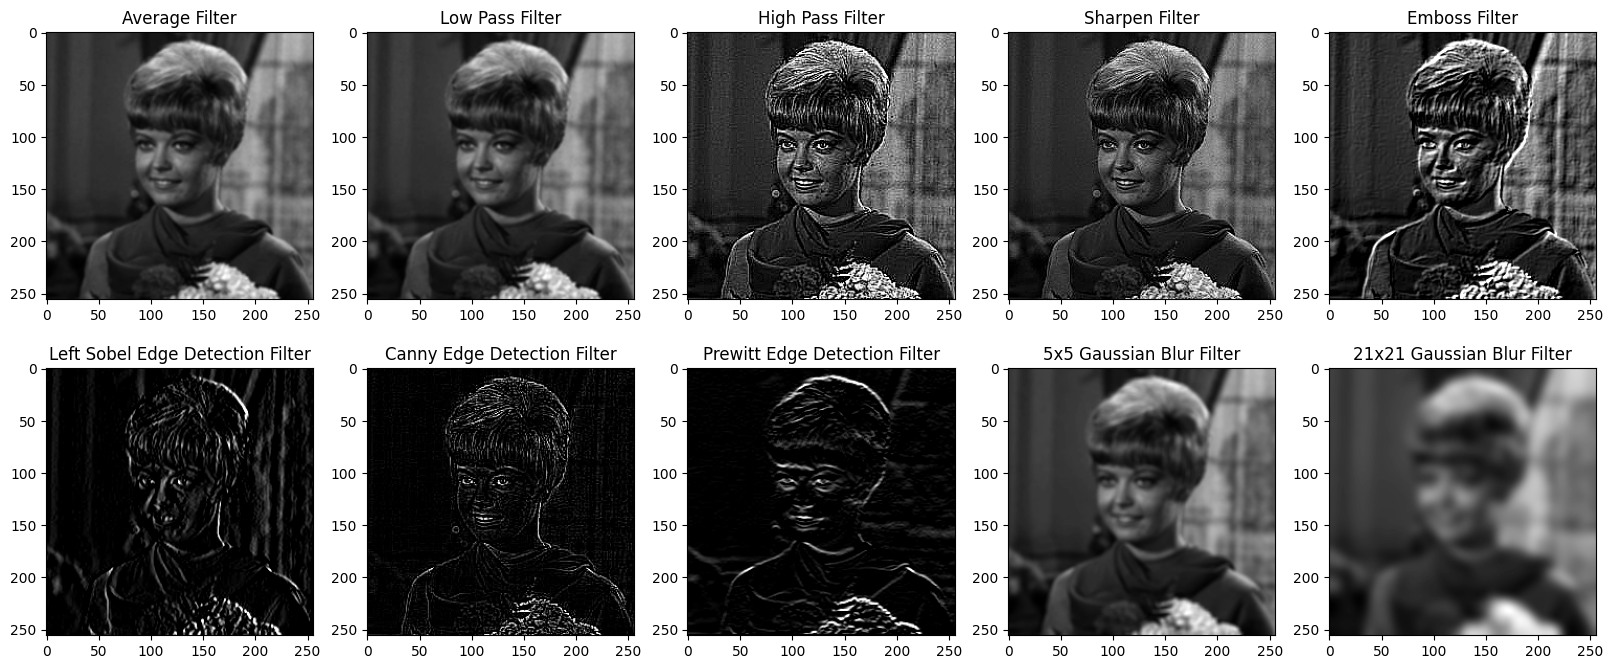

In [29]:
# Mengaplikasikan filter ke citra dan menyimpan hasilnya dalam daftar
filtered_images = [
    cv.filter2D(image, -1, np.ones((3, 3), np.float32) / 9.0),  # Filter Rata-rata
    cv.filter2D(image, -1, gauss_kernel_3x3),  # Filter Low Pass
    cv.filter2D(image, -1, np.array([[-1, -1, -1],
                                    [-1,  9, -1],
                                    [-1, -1, -1]], dtype=np.float32)),  # Filter High Pass
    cv.filter2D(image, -1, np.array([[0, -1, 0],
                                    [-1,  5, -1],
                                    [0, -1, 0]], dtype=np.float32)),  # Filter Sharpen
    cv.filter2D(image, -1, np.array([[-2, -1,  0],
                                    [-1,  1,  1],
                                    [ 0,  1,  2]], dtype=np.float32)),  # Filter Emboss
    cv.filter2D(image, -1, np.array([[1, 0, -1],
                                    [2, 0, -2],
                                    [1, 0, -1]], dtype=np.float32)),  # Filter Deteksi Tepi Kiri Sobel
    cv.filter2D(image, -1, np.array([[-1, -1, -1],
                                    [-1,  8, -1],
                                    [-1, -1, -1]], dtype=np.float32)),  # Filter Deteksi Tepi Canny
    cv.filter2D(image, -1, np.array([[-1, -1, -1],
                                    [0, 0, 0],
                                    [1, 1, 1]], dtype=np.float32)),  # Filter Deteksi Tepi Prewitt
    cv.filter2D(image, -1, gauss_kernel_5x5),  # Filter Gaussian 5x5
    cv.filter2D(image, -1, gauss_kernel_21x21)  # Filter Gaussian 21x21
]

# Membuat subplot untuk setiap citra hasil filter
fig, axs = plt.subplots(2, 5, figsize=(20, 8))

# Menentukan nama filter untuk label
filter_names = [
    'Average Filter',
    'Low Pass Filter',
    'High Pass Filter',
    'Sharpen Filter',
    'Emboss Filter',
    'Left Sobel Edge Detection Filter',
    'Canny Edge Detection Filter',
    'Prewitt Edge Detection Filter',
    '5x5 Gaussian Blur Filter',
    '21x21 Gaussian Blur Filter'
]

# Menampilkan dan memberi label pada setiap citra hasil filter
for i, ax in enumerate(axs.flat):
    ax.imshow(filtered_images[i], cmap='gray')
    ax.set_title(filter_names[i])
    ax.axis('on')

# Menampilkan plot
plt.show()

#TUGAS

Diketahui dataset KTP dengan kondisi citra yang berbeda. Lakukan perbaikan melalui
implementasi teknik filterisasi dan detection setiap citra. Terapkan juga histogram equalization dan
operasi aritmatika sebagai Teknik pendukung perbaikan citra KTP.

###Metode Shaperning

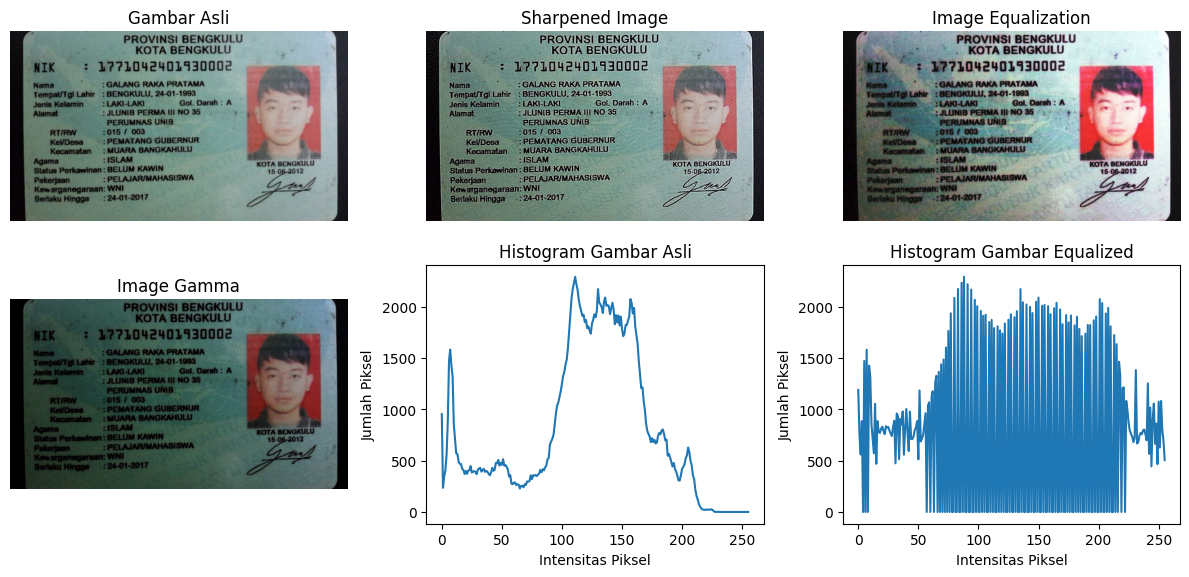

In [41]:
# Gambar KTP
image = cv.imread('/content/drive/MyDrive/PCVK/KTP_More/ktp1.png')
# image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Menggunakan metode Shaperning
kernel_sharpening = np.array([
    [0,-1,0],
    [-1, 5,-1],
    [0,-1,0]
])
sharpened_image = cv.filter2D(image, -1, kernel_sharpening)

# Menggunakan metode Histogram Equalization
r, g, b = cv.split(image)
r_eq = cv.equalizeHist(r)
g_eq = cv.equalizeHist(g)
b_eq = cv.equalizeHist(b)
image_result = cv.merge([r_eq, g_eq, b_eq])

# Menghitung histogram gambar asli dan gambar setelah equalisasi
hist_original = cv.calcHist([image], [0], None, [256], [0, 256])
hist_equalized = cv.calcHist([image_result], [0], None, [256], [0, 256])

# Menggunakan metode Gamma
gamma = 0.5
gamma_image = np.zeros(image.shape, image.dtype)
for x in range(image.shape[0]):
  for y in range(image.shape[1]):
    for z in range(image.shape[2]):
        gamma_image[x,y,z] = np.clip(255 * pow(image[x,y,z]/255,(1/gamma)), 0, 255)


# Menampilkan gambar
plt.figure(figsize=(12, 6))

# Gambar Asli
plt.subplot(2, 3, 1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Gambar Asli')
plt.axis('off')

# Sharpened
plt.subplot(2, 3, 2)
plt.imshow(cv.cvtColor(sharpened_image, cv.COLOR_BGR2RGB))
plt.title('Sharpened Image')
plt.axis('off')

# Equalization
plt.subplot(2, 3, 3)
plt.imshow(cv.cvtColor(image_result, cv.COLOR_BGR2RGB))
plt.title('Image Equalization')
plt.axis('off')

# Gamma Correction
plt.subplot(2, 3, 4)
plt.imshow(cv.cvtColor(gamma_image, cv.COLOR_BGR2RGB))
plt.title('Image Gamma')
plt.axis('off')

# Histogram Gambar Asli
plt.subplot(2, 3, 5)
plt.plot(hist_original)
plt.title('Histogram Gambar Asli')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Jumlah Piksel')

# Histogram Gambar Equalized
plt.subplot(2, 3, 6)
plt.plot(hist_equalized)
plt.title('Histogram Gambar Equalized')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Jumlah Piksel')

plt.tight_layout()
plt.show()

###Metode Emboss

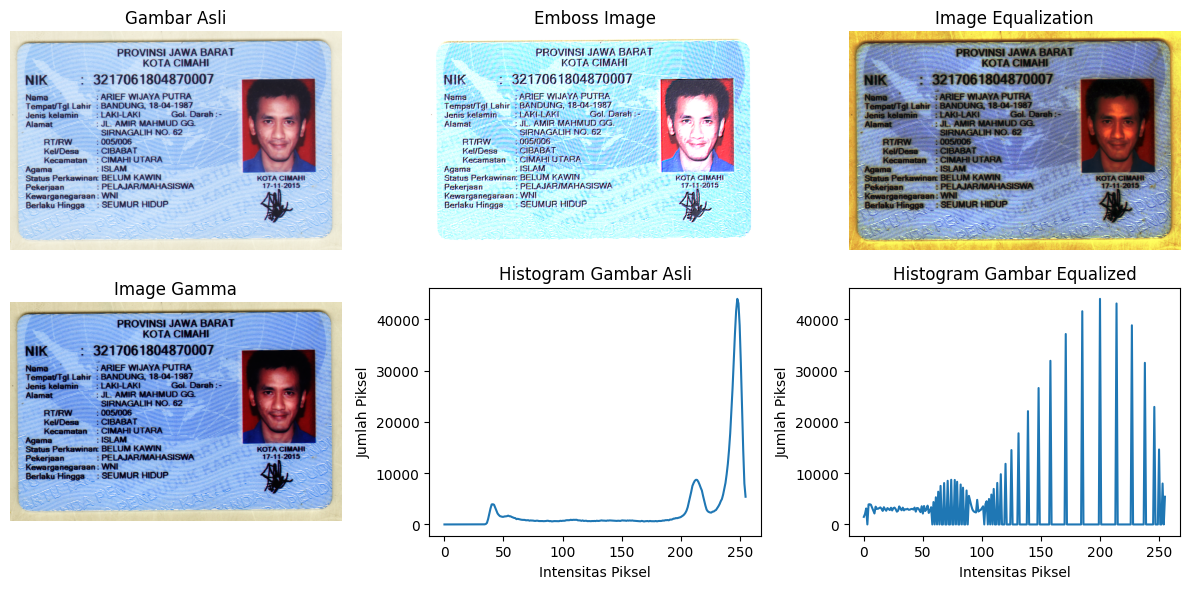

In [40]:
# Gambar KTP
image = cv.imread('/content/drive/MyDrive/PCVK/KTP_More/ktp2.png')
# image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Menggunakan metode Emboss
kernel_emboss = np.array([
    [-2,-1,0],
    [-1,2,1],
    [0,1,2]
])
emboss_image = cv.filter2D(image, -1, kernel_emboss)

# Menggunakan metode Histogram Equalization
r, g, b = cv.split(image)
r_eq = cv.equalizeHist(r)
g_eq = cv.equalizeHist(g)
b_eq = cv.equalizeHist(b)
image_result = cv.merge([r_eq, g_eq, b_eq])

# Menghitung histogram gambar asli dan gambar setelah equalisasi
hist_original = cv.calcHist([image], [0], None, [256], [0, 256])
hist_equalized = cv.calcHist([image_result], [0], None, [256], [0, 256])

# Menggunakan metode Gamma
gamma = 0.5
gamma_image = np.zeros(image.shape, image.dtype)
for x in range(image.shape[0]):
  for y in range(image.shape[1]):
    for z in range(image.shape[2]):
        gamma_image[x,y,z] = np.clip(255 * pow(image[x,y,z]/255,(1/gamma)), 0, 255)


# Menampilkan gambar
plt.figure(figsize=(12, 6))

# Gambar Asli
plt.subplot(2, 3, 1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Gambar Asli')
plt.axis('off')

# Emboss
plt.subplot(2, 3, 2)
plt.imshow(cv.cvtColor(emboss_image, cv.COLOR_BGR2RGB))
plt.title('Emboss Image')
plt.axis('off')

# Equalization
plt.subplot(2, 3, 3)
plt.imshow(cv.cvtColor(image_result, cv.COLOR_BGR2RGB))
plt.title('Image Equalization')
plt.axis('off')

# Gamma Correction
plt.subplot(2, 3, 4)
plt.imshow(cv.cvtColor(gamma_image, cv.COLOR_BGR2RGB))
plt.title('Image Gamma')
plt.axis('off')

# Histogram Gambar Asli
plt.subplot(2, 3, 5)
plt.plot(hist_original)
plt.title('Histogram Gambar Asli')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Jumlah Piksel')

# Histogram Gambar Equalized
plt.subplot(2, 3, 6)
plt.plot(hist_equalized)
plt.title('Histogram Gambar Equalized')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Jumlah Piksel')

plt.tight_layout()
plt.show()

###Metode Left Sobel Edge Detection

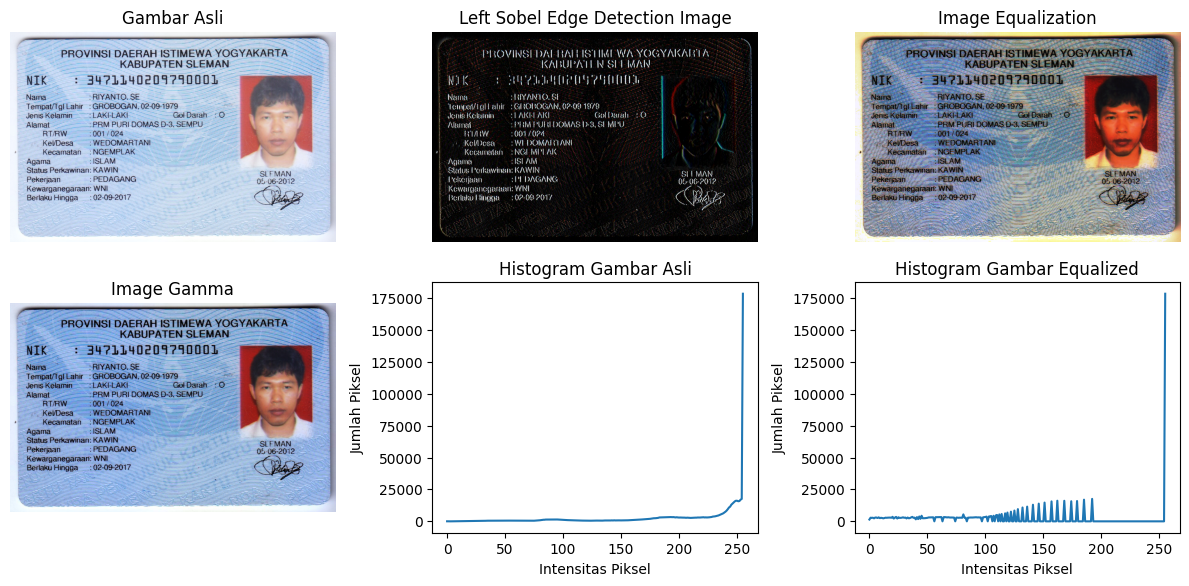

In [39]:
# Gambar KTP
image = cv.imread('/content/drive/MyDrive/PCVK/KTP_More/ktp.png')
# image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Menggunakan metode Left Sobel Edge Detection
kernel_left_sobel = np.array([
    [1,0,-1],
    [2, 0,-2],
    [1,0,-1]
])
left_sobel_image = cv.filter2D(image, -1, kernel_left_sobel)

# Menggunakan metode Histogram Equalization
r, g, b = cv.split(image)
r_eq = cv.equalizeHist(r)
g_eq = cv.equalizeHist(g)
b_eq = cv.equalizeHist(b)
image_result = cv.merge([r_eq, g_eq, b_eq])

# Menghitung histogram gambar asli dan gambar setelah equalisasi
hist_original = cv.calcHist([image], [0], None, [256], [0, 256])
hist_equalized = cv.calcHist([image_result], [0], None, [256], [0, 256])

# Menggunakan metode Gamma
gamma = 0.5
gamma_image = np.zeros(image.shape, image.dtype)
for x in range(image.shape[0]):
  for y in range(image.shape[1]):
    for z in range(image.shape[2]):
        gamma_image[x,y,z] = np.clip(255 * pow(image[x,y,z]/255,(1/gamma)), 0, 255)


# Menampilkan gambar
plt.figure(figsize=(12, 6))

# Gambar Asli
plt.subplot(2, 3, 1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Gambar Asli')
plt.axis('off')

# Left Sobel Edge Detection
plt.subplot(2, 3, 2)
plt.imshow(cv.cvtColor(left_sobel_image, cv.COLOR_BGR2RGB))
plt.title('Left Sobel Edge Detection Image')
plt.axis('off')

# Equalization
plt.subplot(2, 3, 3)
plt.imshow(cv.cvtColor(image_result, cv.COLOR_BGR2RGB))
plt.title('Image Equalization')
plt.axis('off')

# Gamma Correction
plt.subplot(2, 3, 4)
plt.imshow(cv.cvtColor(gamma_image, cv.COLOR_BGR2RGB))
plt.title('Image Gamma')
plt.axis('off')

# Histogram Gambar Asli
plt.subplot(2, 3, 5)
plt.plot(hist_original)
plt.title('Histogram Gambar Asli')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Jumlah Piksel')

# Histogram Gambar Equalized
plt.subplot(2, 3, 6)
plt.plot(hist_equalized)
plt.title('Histogram Gambar Equalized')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Jumlah Piksel')

plt.tight_layout()
plt.show()

###Metode Canny Edge Detection

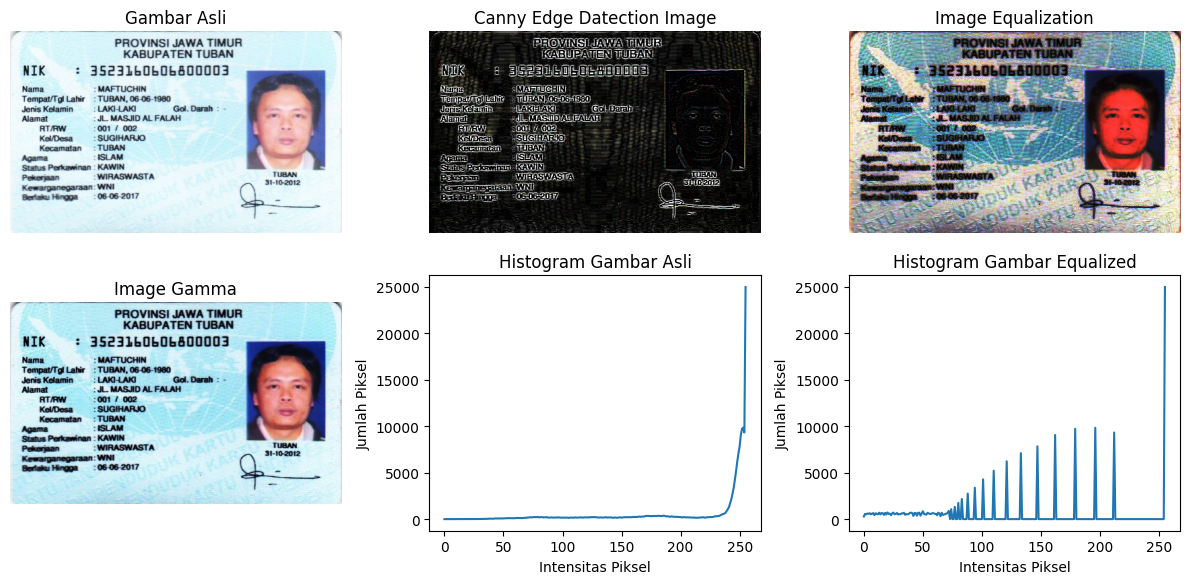

In [37]:
# Gambar KTP
image = cv.imread('/content/drive/MyDrive/PCVK/KTP_More/ktp4.png')
# image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Menggunakan metode Canny Edge Detection
kernel_canny_edge = np.array([
    [-1,-1,-1],
    [-1, 8,-1],
    [-1,-1,-1]
])
canny_image = cv.filter2D(image, -1, kernel_canny_edge)

# Menggunakan metode Histogram Equalization
r, g, b = cv.split(image)
r_eq = cv.equalizeHist(r)
g_eq = cv.equalizeHist(g)
b_eq = cv.equalizeHist(b)
image_result = cv.merge([r_eq, g_eq, b_eq])

# Menghitung histogram gambar asli dan gambar setelah equalisasi
hist_original = cv.calcHist([image], [0], None, [256], [0, 256])
hist_equalized = cv.calcHist([image_result], [0], None, [256], [0, 256])

# Menggunakan metode Gamma
gamma = 0.5
gamma_image = np.zeros(image.shape, image.dtype)
for x in range(image.shape[0]):
  for y in range(image.shape[1]):
    for z in range(image.shape[2]):
        gamma_image[x,y,z] = np.clip(255 * pow(image[x,y,z]/255,(1/gamma)), 0, 255)


# Menampilkan gambar
plt.figure(figsize=(12, 6))

# Gambar Asli
plt.subplot(2, 3, 1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Gambar Asli')
plt.axis('off')

# Canny Edge Datection
plt.subplot(2, 3, 2)
plt.imshow(cv.cvtColor(canny_image, cv.COLOR_BGR2RGB))
plt.title('Canny Edge Datection Image')
plt.axis('off')

# Equalization
plt.subplot(2, 3, 3)
plt.imshow(cv.cvtColor(image_result, cv.COLOR_BGR2RGB))
plt.title('Image Equalization')
plt.axis('off')

# Gamma Correction
plt.subplot(2, 3, 4)
plt.imshow(cv.cvtColor(gamma_image, cv.COLOR_BGR2RGB))
plt.title('Image Gamma')
plt.axis('off')

# Histogram Gambar Asli
plt.subplot(2, 3, 5)
plt.plot(hist_original)
plt.title('Histogram Gambar Asli')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Jumlah Piksel')

# Histogram Gambar Equalized
plt.subplot(2, 3, 6)
plt.plot(hist_equalized)
plt.title('Histogram Gambar Equalized')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Jumlah Piksel')

plt.tight_layout()
plt.show()


### Menggunakan metode Prewitt Edge Detection

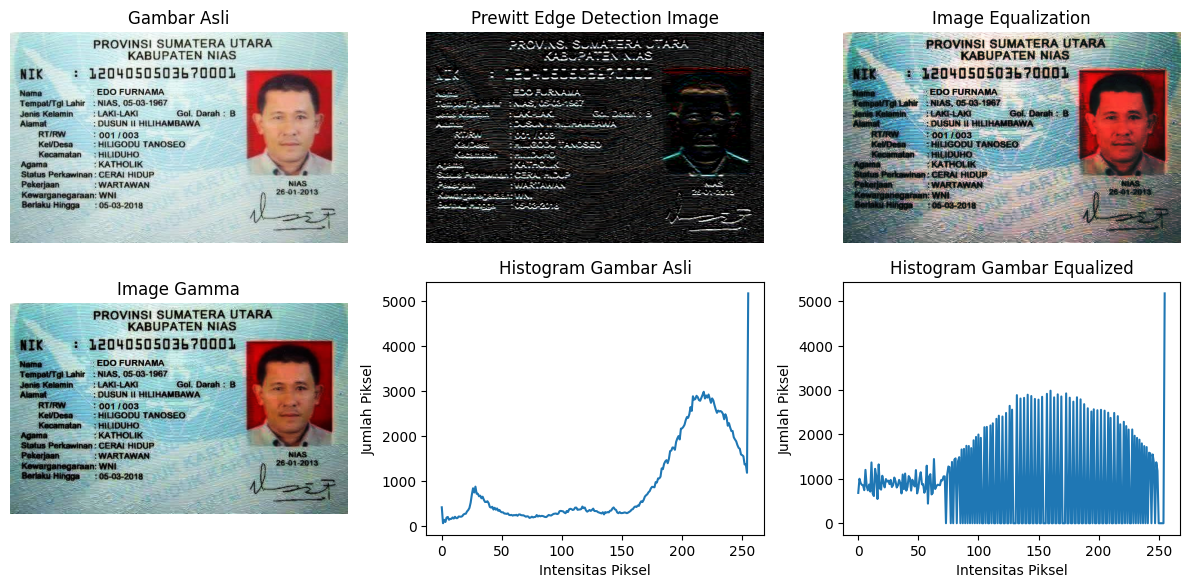

In [36]:
# Gambar KTP
image = cv.imread('/content/drive/MyDrive/PCVK/KTP_More/ktp5.png')
# image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Menggunakan metode Prewitt Edge Detection
kernel_prewitt= np.array([
    [-1,-1,-1],
    [0, 0,0],
    [1,1,1]
])
prewitt_image = cv.filter2D(image, -1, kernel_prewitt)

# Menggunakan metode Histogram Equalization
r, g, b = cv.split(image)
r_eq = cv.equalizeHist(r)
g_eq = cv.equalizeHist(g)
b_eq = cv.equalizeHist(b)
image_result = cv.merge([r_eq, g_eq, b_eq])

# Menghitung histogram gambar asli dan gambar setelah equalisasi
hist_original = cv.calcHist([image], [0], None, [256], [0, 256])
hist_equalized = cv.calcHist([image_result], [0], None, [256], [0, 256])

# Menggunakan metode Gamma
gamma = 0.5
gamma_image = np.zeros(image.shape, image.dtype)
for x in range(image.shape[0]):
  for y in range(image.shape[1]):
    for z in range(image.shape[2]):
        gamma_image[x,y,z] = np.clip(255 * pow(image[x,y,z]/255,(1/gamma)), 0, 255)


# Menampilkan gambar
plt.figure(figsize=(12, 6))

# Gambar Asli
plt.subplot(2, 3, 1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Gambar Asli')
plt.axis('off')

# Prewitt Edge Detection
plt.subplot(2, 3, 2)
plt.imshow(cv.cvtColor(prewitt_image, cv.COLOR_BGR2RGB))
plt.title('Prewitt Edge Detection Image')
plt.axis('off')

# Equalization
plt.subplot(2, 3, 3)
plt.imshow(cv.cvtColor(image_result, cv.COLOR_BGR2RGB))
plt.title('Image Equalization')
plt.axis('off')

# Gamma Correction
plt.subplot(2, 3, 4)
plt.imshow(cv.cvtColor(gamma_image, cv.COLOR_BGR2RGB))
plt.title('Image Gamma')
plt.axis('off')

# Histogram Gambar Asli
plt.subplot(2, 3, 5)
plt.plot(hist_original)
plt.title('Histogram Gambar Asli')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Jumlah Piksel')

# Histogram Gambar Equalized
plt.subplot(2, 3, 6)
plt.plot(hist_equalized)
plt.title('Histogram Gambar Equalized')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Jumlah Piksel')

plt.tight_layout()
plt.show()

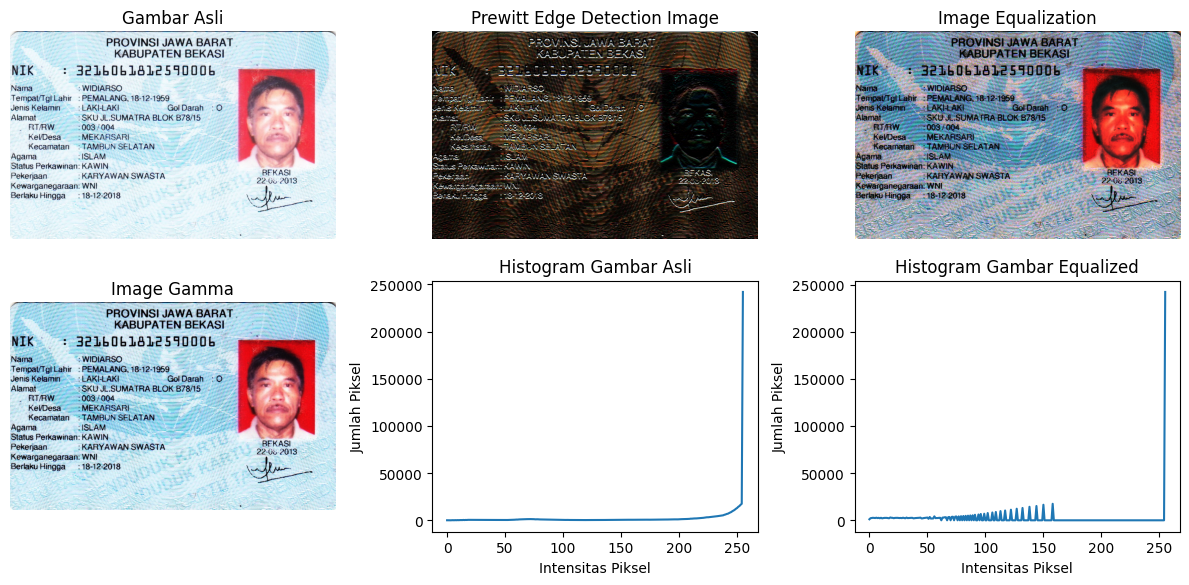

In [42]:
# Gambar KTP
image = cv.imread('/content/drive/MyDrive/PCVK/KTP_More/ktp6.png')
# image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Menggunakan metode Prewitt Edge Detection
kernel_prewitt= np.array([
    [-1,-1,-1],
    [0, 0,0],
    [1,1,1]
])
prewitt_image = cv.filter2D(image, -1, kernel_prewitt)

# Menggunakan metode Histogram Equalization
r, g, b = cv.split(image)
r_eq = cv.equalizeHist(r)
g_eq = cv.equalizeHist(g)
b_eq = cv.equalizeHist(b)
image_result = cv.merge([r_eq, g_eq, b_eq])

# Menghitung histogram gambar asli dan gambar setelah equalisasi
hist_original = cv.calcHist([image], [0], None, [256], [0, 256])
hist_equalized = cv.calcHist([image_result], [0], None, [256], [0, 256])

# Menggunakan metode Gamma
gamma = 0.5
gamma_image = np.zeros(image.shape, image.dtype)
for x in range(image.shape[0]):
  for y in range(image.shape[1]):
    for z in range(image.shape[2]):
        gamma_image[x,y,z] = np.clip(255 * pow(image[x,y,z]/255,(1/gamma)), 0, 255)


# Menampilkan gambar
plt.figure(figsize=(12, 6))

# Gambar Asli
plt.subplot(2, 3, 1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Gambar Asli')
plt.axis('off')

# Prewitt Edge Detection
plt.subplot(2, 3, 2)
plt.imshow(cv.cvtColor(prewitt_image, cv.COLOR_BGR2RGB))
plt.title('Prewitt Edge Detection Image')
plt.axis('off')

# Equalization
plt.subplot(2, 3, 3)
plt.imshow(cv.cvtColor(image_result, cv.COLOR_BGR2RGB))
plt.title('Image Equalization')
plt.axis('off')

# Gamma Correction
plt.subplot(2, 3, 4)
plt.imshow(cv.cvtColor(gamma_image, cv.COLOR_BGR2RGB))
plt.title('Image Gamma')
plt.axis('off')

# Histogram Gambar Asli
plt.subplot(2, 3, 5)
plt.plot(hist_original)
plt.title('Histogram Gambar Asli')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Jumlah Piksel')

# Histogram Gambar Equalized
plt.subplot(2, 3, 6)
plt.plot(hist_equalized)
plt.title('Histogram Gambar Equalized')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Jumlah Piksel')

plt.tight_layout()
plt.show()

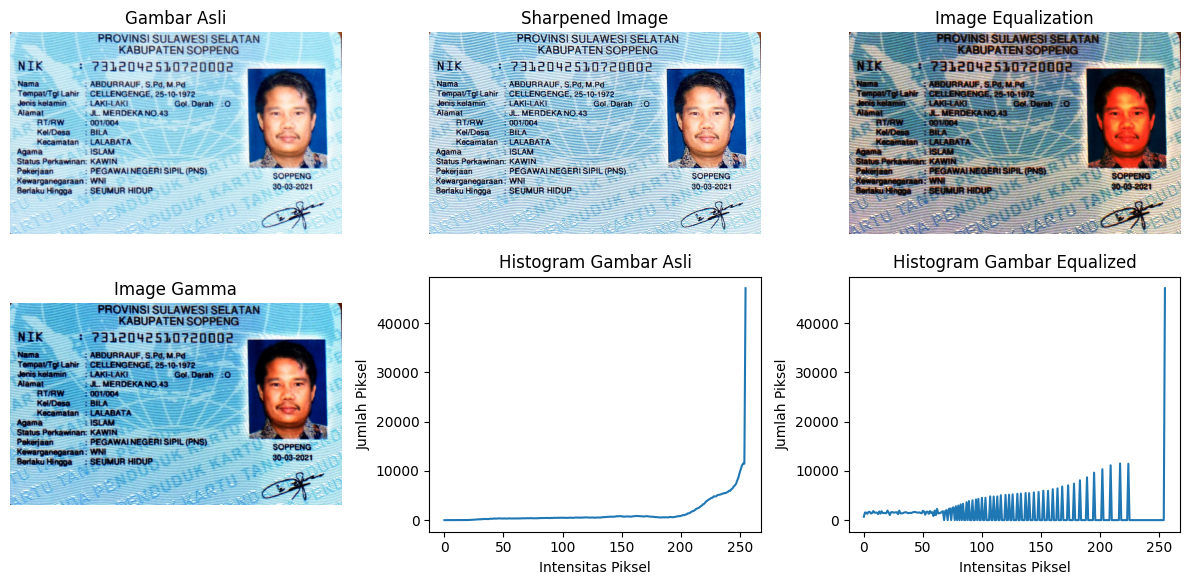

In [43]:
# Gambar KTP
image = cv.imread('/content/drive/MyDrive/PCVK/KTP_More/KTP7.jpeg')
# image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Menggunakan metode Shaperning
kernel_sharpening = np.array([
    [0,-1,0],
    [-1, 5,-1],
    [0,-1,0]
])
sharpened_image = cv.filter2D(image, -1, kernel_sharpening)

# Menggunakan metode Histogram Equalization
r, g, b = cv.split(image)
r_eq = cv.equalizeHist(r)
g_eq = cv.equalizeHist(g)
b_eq = cv.equalizeHist(b)
image_result = cv.merge([r_eq, g_eq, b_eq])

# Menghitung histogram gambar asli dan gambar setelah equalisasi
hist_original = cv.calcHist([image], [0], None, [256], [0, 256])
hist_equalized = cv.calcHist([image_result], [0], None, [256], [0, 256])

# Menggunakan metode Gamma
gamma = 0.5
gamma_image = np.zeros(image.shape, image.dtype)
for x in range(image.shape[0]):
  for y in range(image.shape[1]):
    for z in range(image.shape[2]):
        gamma_image[x,y,z] = np.clip(255 * pow(image[x,y,z]/255,(1/gamma)), 0, 255)


# Menampilkan gambar
plt.figure(figsize=(12, 6))

# Gambar Asli
plt.subplot(2, 3, 1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Gambar Asli')
plt.axis('off')

# Sharpened
plt.subplot(2, 3, 2)
plt.imshow(cv.cvtColor(sharpened_image, cv.COLOR_BGR2RGB))
plt.title('Sharpened Image')
plt.axis('off')

# Equalization
plt.subplot(2, 3, 3)
plt.imshow(cv.cvtColor(image_result, cv.COLOR_BGR2RGB))
plt.title('Image Equalization')
plt.axis('off')

# Gamma Correction
plt.subplot(2, 3, 4)
plt.imshow(cv.cvtColor(gamma_image, cv.COLOR_BGR2RGB))
plt.title('Image Gamma')
plt.axis('off')

# Histogram Gambar Asli
plt.subplot(2, 3, 5)
plt.plot(hist_original)
plt.title('Histogram Gambar Asli')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Jumlah Piksel')

# Histogram Gambar Equalized
plt.subplot(2, 3, 6)
plt.plot(hist_equalized)
plt.title('Histogram Gambar Equalized')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Jumlah Piksel')

plt.tight_layout()
plt.show()